In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [12]:
# Load the cleaned data
df_cleaned = pd.read_csv('/Users/sayansarkar/Documents/Project/COVID-19-Analytics/Data/archive/full_grouped_cleaned.csv')
df_cleaned.info()
df_cleaned.descibe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


AttributeError: 'DataFrame' object has no attribute 'descibe'

In [3]:
# Convert Date column to datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

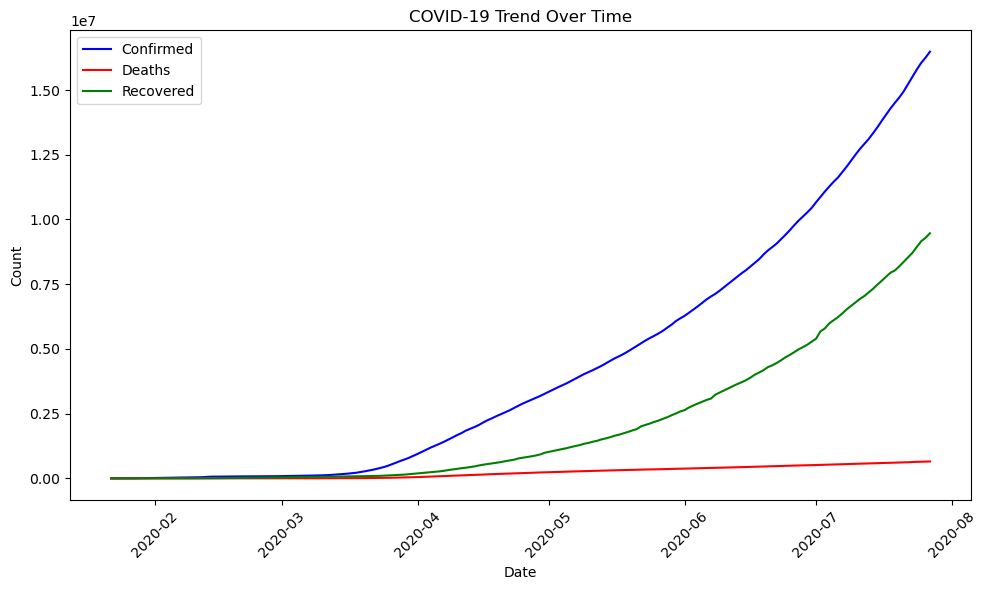

In [4]:
# 1. Trend of confirmed cases, deaths, and recoveries over time
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.groupby('Date')['Confirmed'].sum(), label='Confirmed', color='blue')
plt.plot(df_cleaned.groupby('Date')['Deaths'].sum(), label='Deaths', color='red')
plt.plot(df_cleaned.groupby('Date')['Recovered'].sum(), label='Recovered', color='green')
plt.title('COVID-19 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/jx/pq87xb6x0lz5mvx2qhk140bw0000gn/T/ipykernel_6836/2900770243.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


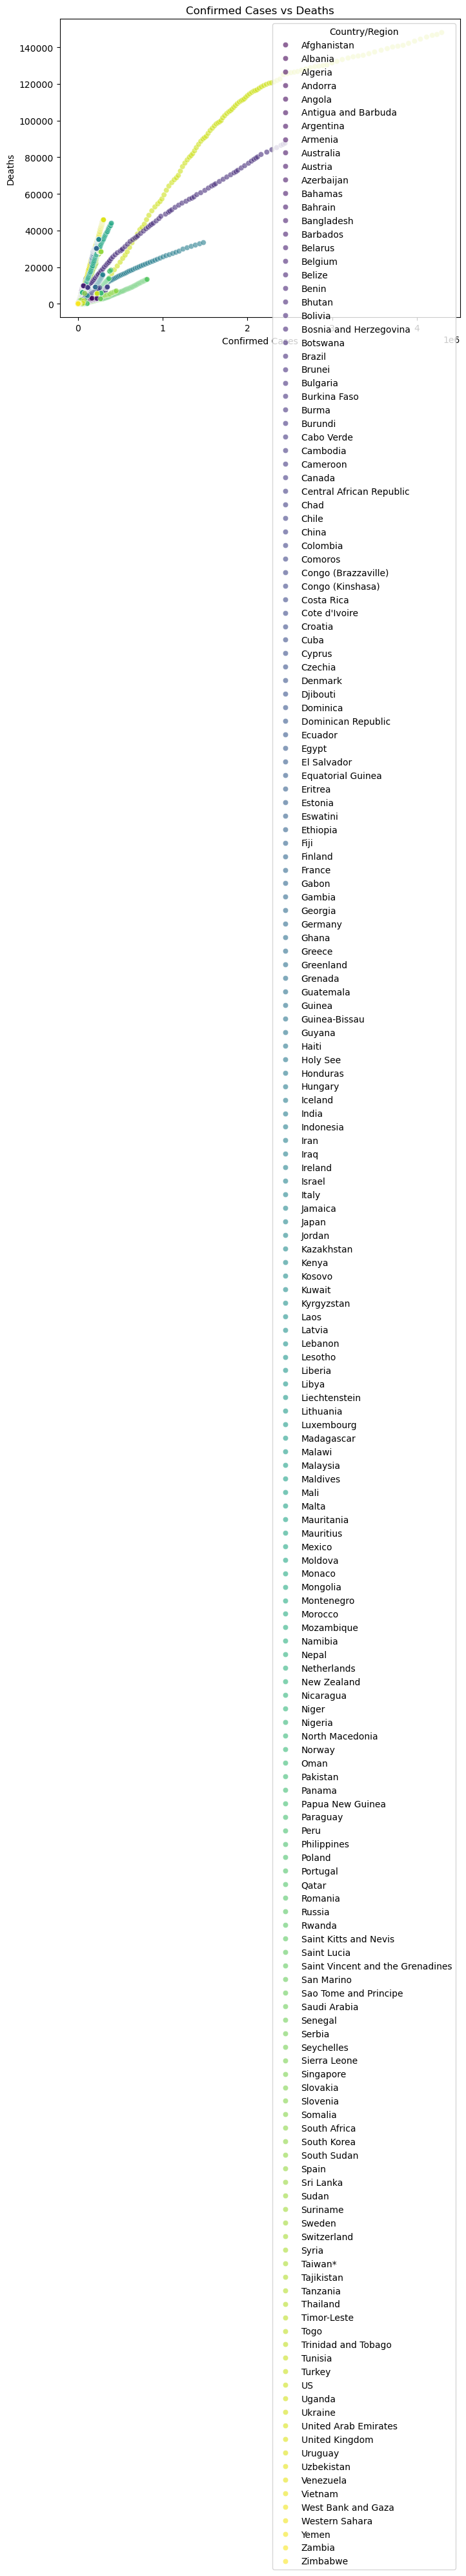

In [5]:

# 2. Confirmed cases vs Deaths (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Confirmed', y='Deaths', hue='Country/Region', palette='viridis', alpha=0.6)
plt.title('Confirmed Cases vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.tight_layout()
plt.show()

/var/folders/jx/pq87xb6x0lz5mvx2qhk140bw0000gn/T/ipykernel_6836/2751214680.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


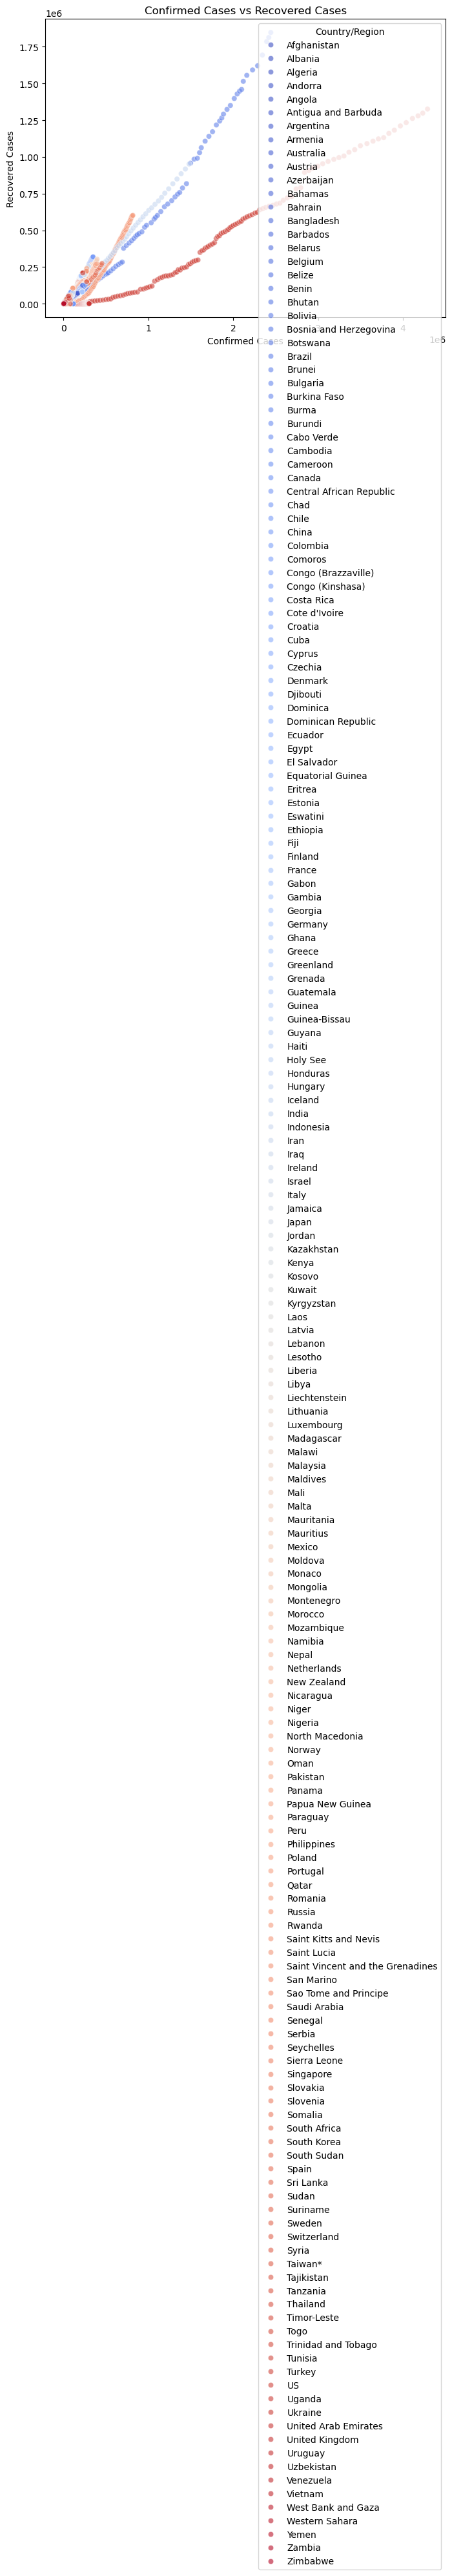

In [6]:
# 3. Confirmed cases vs Recovered cases (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Confirmed', y='Recovered', hue='Country/Region', palette='coolwarm', alpha=0.6)
plt.title('Confirmed Cases vs Recovered Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered Cases')
plt.tight_layout()
plt.show()

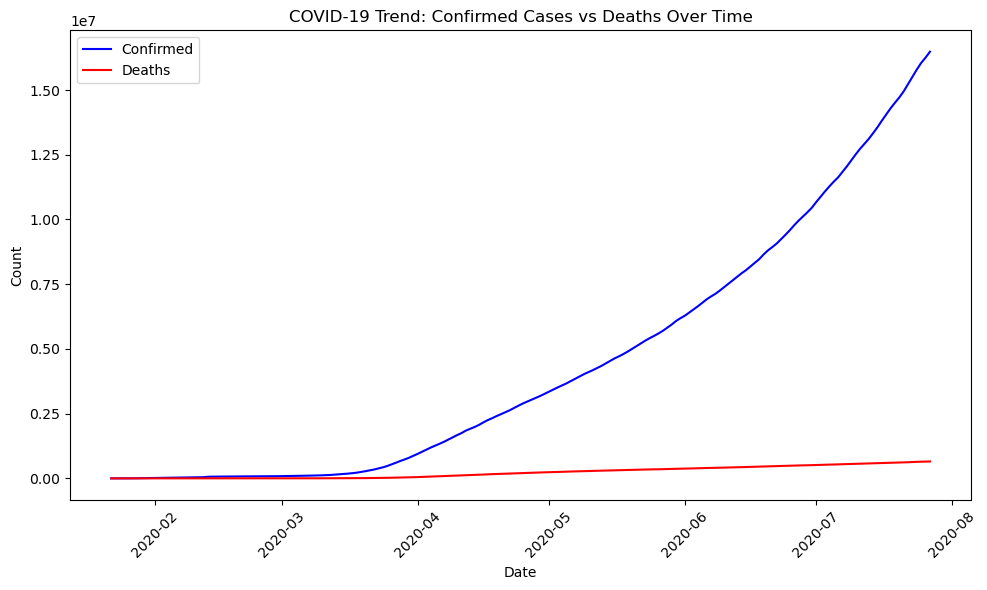

In [7]:
# 1. Trend of Confirmed Cases vs Deaths over time
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.groupby('Date')['Confirmed'].sum(), label='Confirmed', color='blue')
plt.plot(df_cleaned.groupby('Date')['Deaths'].sum(), label='Deaths', color='red')
plt.title('COVID-19 Trend: Confirmed Cases vs Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




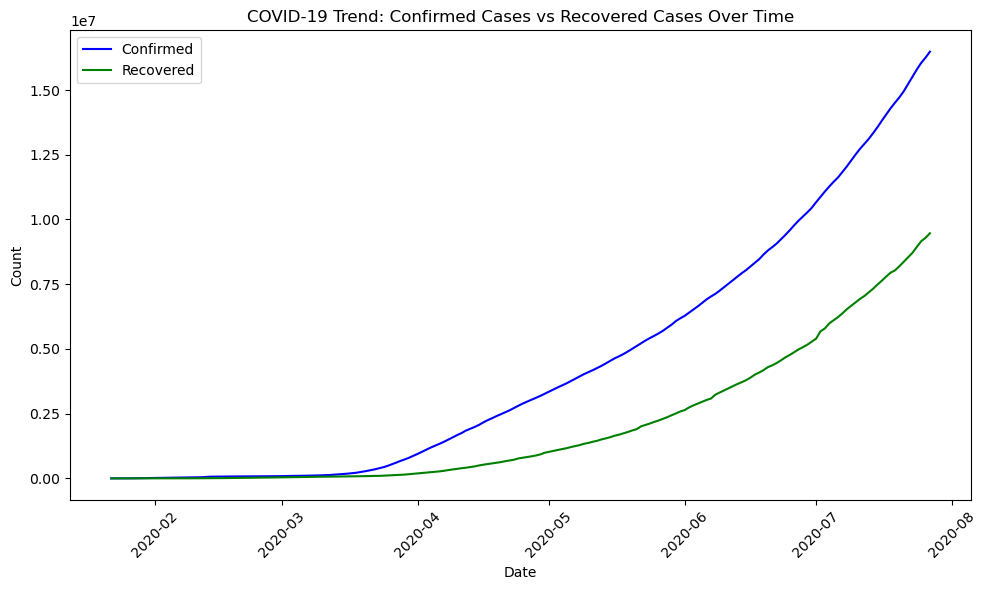

In [8]:
# 2. Trend of Confirmed Cases vs Recovered over time
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned.groupby('Date')['Confirmed'].sum(), label='Confirmed', color='blue')
plt.plot(df_cleaned.groupby('Date')['Recovered'].sum(), label='Recovered', color='green')
plt.title('COVID-19 Trend: Confirmed Cases vs Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

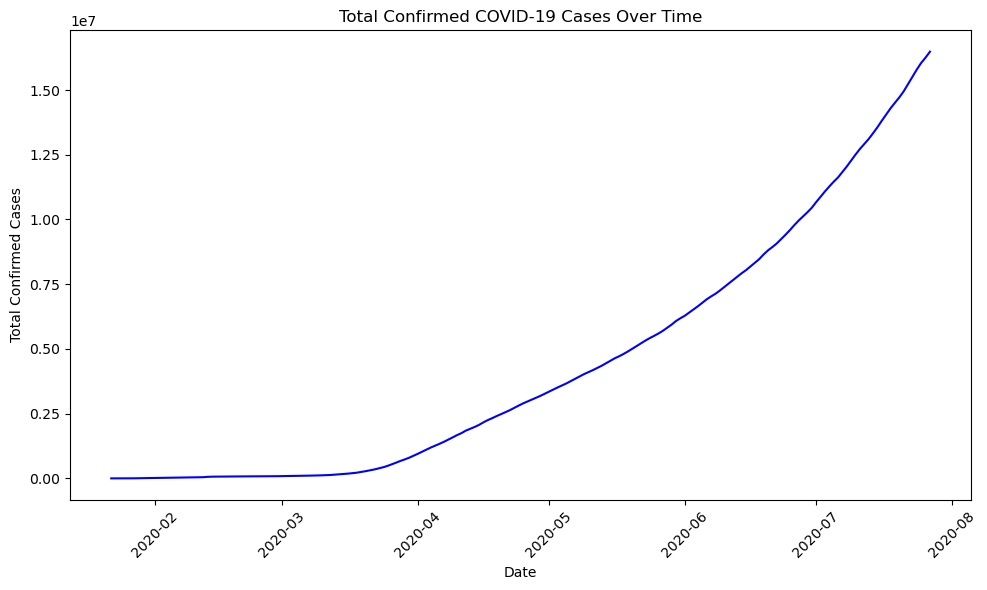

In [9]:
# Time series Analysis

# Aggregate data by date for confirmed cases
confirmed_cases = df_cleaned.groupby('Date')['Confirmed'].sum()

# Plot the trend of confirmed cases over time
plt.figure(figsize=(10, 6))
plt.plot(confirmed_cases, color='blue')
plt.title('Total Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


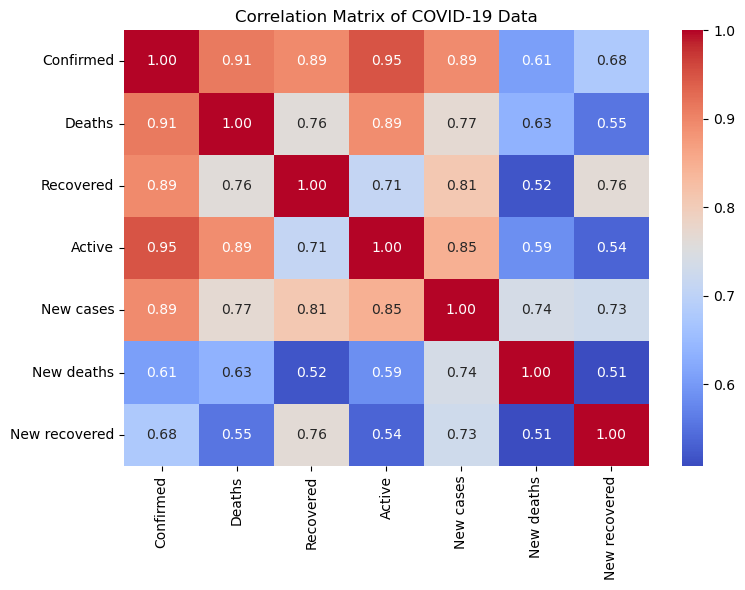

In [10]:
# corealation Analysis

# Calculate correlation matrix
correlation_matrix = df_cleaned[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']].corr()

# Plot the heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of COVID-19 Data')
plt.tight_layout()
plt.show()
